# Sleep-deprived reactions

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import random


In [20]:
file_path = "/Users/guillaumedenis/Programmation/Python/A Student's Guide to Bayesian Statistics/All_data/evaluation_sleepstudy.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308


In [21]:
# Column name to lower
df.columns = [x.lower() for x in df.columns]

# Drop column
col_drop = df.columns[0]
df.drop(col_drop, axis = 1, inplace = True)

## Data Plots

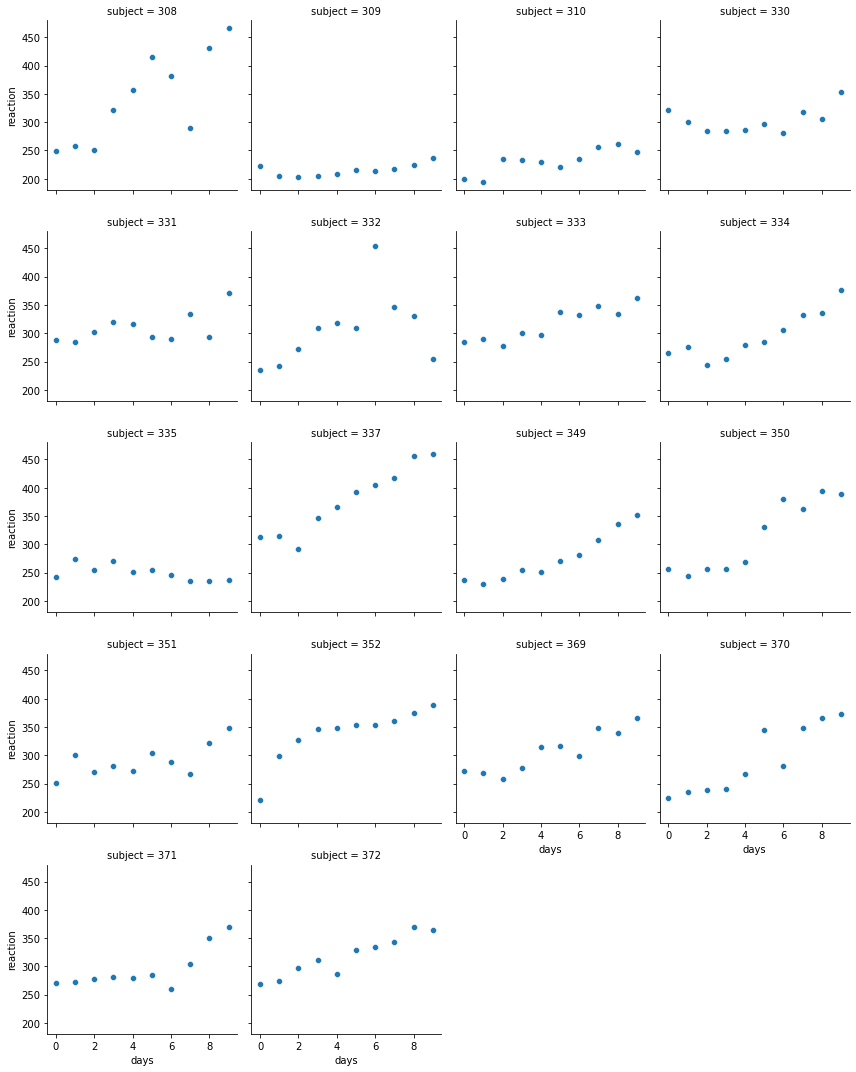

In [22]:
g = sns.FacetGrid(data = df, col = "subject", col_wrap = 4)
g.map(sns.scatterplot, "days", "reaction")

## Posterior predictive distribution

In [26]:
file_path = "/Users/guillaumedenis/Programmation/Python/A Student's Guide to Bayesian Statistics/All_data/evaluation_sleepPosteriors.csv"
post_dist = pd.read_csv(file_path)

print(post_dist.shape)
post_dist.head()

(2000, 3)


,alpha,beta,sigma
0,250.246247,11.285135,46.573805
1,237.289241,11.554517,51.724668
2,252.714118,10.737308,48.601722
3,256.015684,9.356107,47.720431
4,250.676028,10.504028,49.622463


In [134]:
# Generate sample from posterior predictive distribution
sampled_data = post_dist.sample(n = df.shape[0], random_state = 3200)
sampled_data.reset_index(inplace = True, drop = True)

# Mean
sampled_data["mu"] = sampled_data["alpha"] + sampled_data["beta"]* df["days"]

# Generate data
np.random.seed(191)
y_data = pd.Series(np.random.normal(sampled_data["mu"], sampled_data["sigma"], sampled_data.shape[0]))
df["gen_reaction"] = y_data        

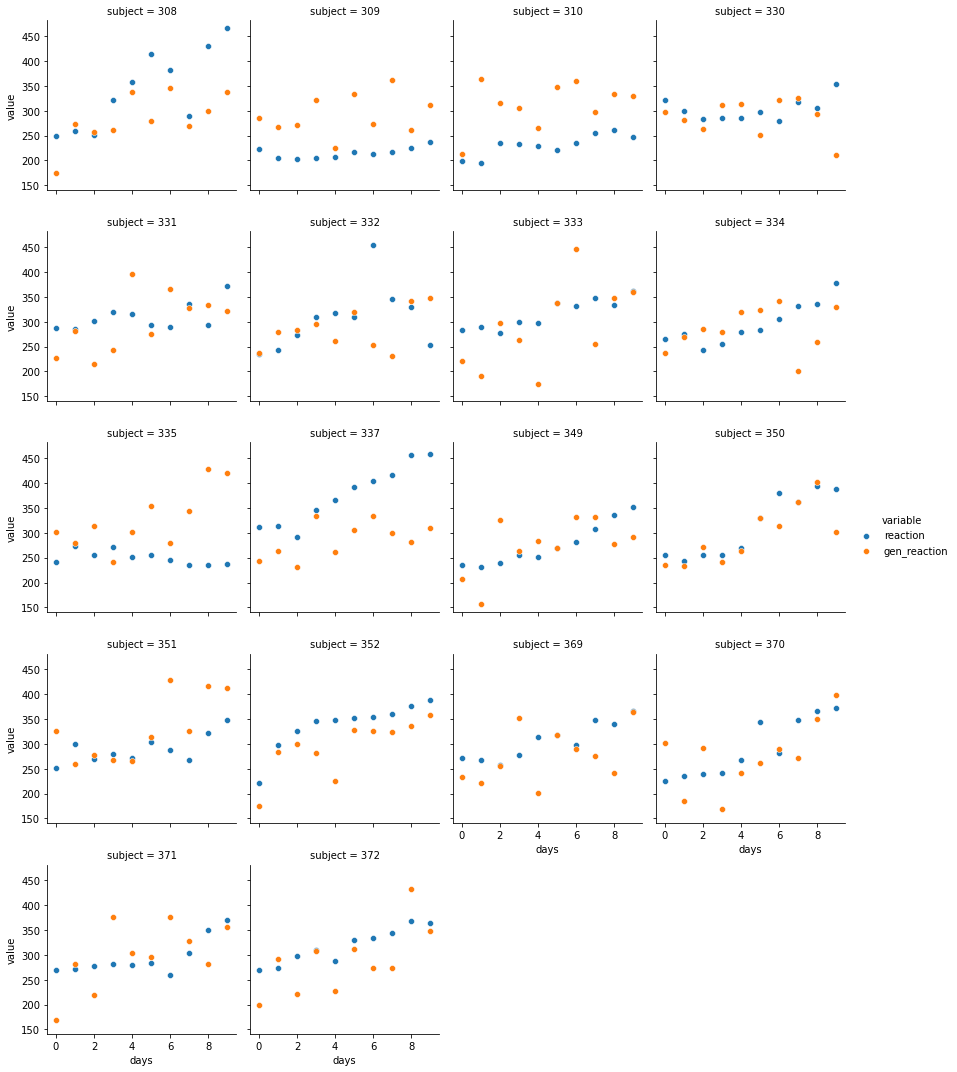

In [135]:
# Plot simulated data
df_graph = pd.melt(df, id_vars = ["subject", "days"], value_vars = ["reaction", "gen_reaction"])

# Scatter plot by subject
g = sns.FacetGrid(data = df_graph, col = "subject", hue = "variable", col_wrap = 4)
g.map(sns.scatterplot, "days", "value")
g.add_legend()

<AxesSubplot:xlabel='days', ylabel='value'>

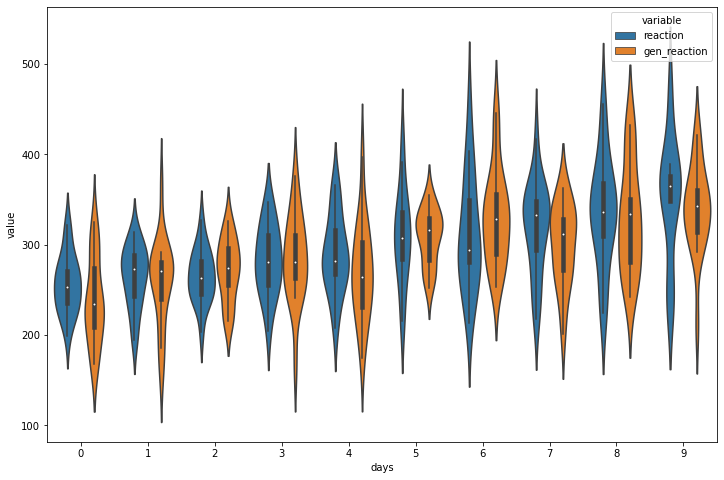

In [136]:
# Violin plot per day
plt.figure(figsize = (12,8))
sns.violinplot(data = df_graph, x = "days", y = "value", hue = "variable")